<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Review Analysis

## Context

The product companies can utilize the detailed review comments to gather insights from the end user. Most of the products are sold via e-commerce sites like Flipkart or Amazon where customers can buy a product and give their review about the product on the web site. 
Product managers can identify the relevant reviews from the website and run a sentiment analysis tool to understand what the sentiments of the customer are. Based on their sentiments, they can identify what users think of the current product. Are they happy? Discontent? 
They can also come up with a document that lists the features, the team needs to focus on for making the product better. 

## Objective

Given the review data rating label, we will try to get insights about various brands and their ratings using text analytics and build a model to predict the rating and overall sentiment. 


### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

product_data.csv - contains product details
- 'asin',  - Product ASIN
- 'brand', - Product Brand
- 'title', - Product Title
- 'url',  - Product URL
- 'image', - Product Image URL
- 'rating',- Product Avg. Rating
- 'reviewUrl' - Product Review Page URL
- 'totalReviews' - Product Total Reviews
- ‘price’ - Product Price ($)
- ‘originalPrice’ - Product Original Price ($)
 
reviews.csv  - contains user review details
 
- 'asin' - Product ASIN
- 'name' - Reviewer Name
- 'rating' - Reviewer Rating (scale 1 to 5)
- 'date'  - Review Date
- 'verified' - Valid Customer
- 'title'  - Review Title
- 'body'  - Review Content
- 'helpfulVotes  - Helpful Feedbacks


## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and EDA

5. Text preprocessing and Vectorization

6. Model building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [23]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.5.0


## 2. Setting Options

In [24]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

In [25]:
path = '/content/drive/MyDrive/LabStats/'

## 3. Read Data

### 3.1 Read the provided CSVs and check 5 random samples and shape to understand the datasets

In [26]:
prod_dat = pd.read_csv(path+'product_data.csv')
prod_dat.sample(5)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
353,B079HB518K,Apple,"Apple iPhone 7, 32GB, Rose Gold - For AT&T / T...",https://www.amazon.com/Apple-iPhone-GSM-Unlock...,https://m.media-amazon.com/images/I/71x3e0x+M2...,3.9000000,https://www.amazon.com/product-reviews/B079HB518K,243,199.0000000,206.9000000
593,B07R57VRJ7,Samsung,Samsung Galaxy A70 (SM-A7050) 6GB / 128GB 6.7-...,https://www.amazon.com/Samsung-SM-A7050-6-7-in...,https://m.media-amazon.com/images/I/61HQhbnTQk...,5.0000000,https://www.amazon.com/product-reviews/B07R57VRJ7,1,350.0000000,0.0000000
388,B07CGMQDXW,Apple,"Apple iPhone 8 Plus, 64GB, Space Gray - For Ve...",https://www.amazon.com/Apple-iPhone-Plus-Veriz...,https://m.media-amazon.com/images/I/71MRY6+c8p...,4.2000000,https://www.amazon.com/product-reviews/B07CGMQDXW,1,373.5300000,0.0000000
118,B01ATTBXY8,Motorola,Motorola Droid Turbo - 32GB Android Smartphone...,https://www.amazon.com/Motorola-Droid-Turbo-Sm...,https://m.media-amazon.com/images/I/91oY6n78hh...,3.8000000,https://www.amazon.com/product-reviews/B01ATTBXY8,209,74.9900000,0.0000000
409,B07F3YGL26,Xiaomi,Xiaomi Redmi S2 (32GB 3GB RAM) with AI Smart S...,https://www.amazon.com/Cameras-Display-Unlocke...,https://m.media-amazon.com/images/I/41NTLwPYT6...,5.0000000,https://www.amazon.com/product-reviews/B07F3YGL26,1,139.9900000,155.0000000


In [27]:
prod_dat.shape

(720, 10)

In [28]:
rev_dat = pd.read_csv(path+'reviews.csv')
rev_dat.sample(5)

,asin,name,rating,date,verified,title,body,helpfulVotes
42686,B0775H5HJW,Shlomo,5,"May 27, 2019",True,It is very heavy,Very good phone,nan
10201,B00HWEMZ1E,Keith Johnson,5,"June 13, 2015",True,I personally like a heavier feel so this one i...,"The weight, glass, feel and the camera are out...",1.0000000
65091,B07VZL1W7K,Elle,5,"December 2, 2019",True,Excellent Phone,"large screen, has everything the newer phones ...",2.0000000
32742,B06XS4978K,Mrs. Lebron,5,"December 4, 2019",True,Lucky to have found,Deal of a lifetime,nan
12795,B00MWI4KKE,mark moore,5,"August 14, 2015",True,The X14 is amazing.. just make sure you get th...,"this is a Nexus, don't let the name fool you. ...",1.0000000


In [29]:
rev_dat.shape

(67986, 8)

## 4.  Data Analysis and EDA

### 4.1 Drop unnecessary columns like 'url', 'image' from the product_data

In [30]:
prod_dat.drop(['url', 'image', 'reviewUrl'], inplace=True, axis=1)


In [31]:
prod_dat.sample(5)

,asin,brand,title,rating,totalReviews,price,originalPrice
301,B0766TPHSH,Google,Google Pixel 2 XL 64GB Unlocked GSM/CDMA 4G LT...,4.1000000,153,409.8800000,0.0000000
558,B07PZZLR4D,Motorola,"Motorola Moto G7 (64GB, 4GB RAM) Dual SIM 6.2""...",4.0000000,16,153.0000000,0.0000000
307,B076M9RQJ2,Samsung,Samsung Galaxy S8 64GB Phone - 5.8in Unlocked ...,4.1000000,167,269.9900000,0.0000000
555,B07PW9XW1G,HUAWEI,Huawei E8372h-608 Unlocked 150 Mbps 4G LTE Mod...,3.4000000,3,79.9900000,0.0000000
31,B0096QYH80,Motorola,"Motorola Droid RAZR M XT907 Verizon Wireless, ...",3.0000000,488,349.9900000,0.0000000


In [32]:
prod_dat.shape

(720, 7)

### 4.2 Check statistical summary of both datasets. Note:- Include both numerical and object type columns.

In [33]:
prod_dat.describe()

,rating,totalReviews,price,originalPrice
count,720.0000000,720.0000000,720.0000000,720.0000000
mean,3.7137500,105.6791667,234.9489306,63.6907778
std,0.7160138,167.6011014,200.0084407,172.4053696
min,1.0000000,1.0000000,0.0000000,0.0000000
25%,3.3000000,7.0000000,97.5125000,0.0000000
50%,3.8000000,32.0000000,188.9750000,0.0000000
75%,4.1000000,122.2500000,336.7250000,0.0000000
max,5.0000000,983.0000000,999.9900000,999.9900000


In [34]:
prod_dat.describe(include='O')

,asin,brand,title
count,720,716,720
unique,720,10,718
top,B07Z41LHPB,Samsung,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ..."
freq,1,346,2


In [35]:
prod_dat.corr()

,rating,totalReviews,price,originalPrice
rating,1.0000000,0.0732954,0.1617453,0.1112378
totalReviews,0.0732954,1.0000000,-0.0167851,0.0921686
price,0.1617453,-0.0167851,1.0000000,0.2937674
originalPrice,0.1112378,0.0921686,0.2937674,1.0000000


In [36]:
rev_dat.describe()

,rating,helpfulVotes
count,67986.0000000,27215.0000000
mean,3.8079163,8.2296895
std,1.5829058,31.9548772
min,1.0000000,1.0000000
25%,3.0000000,1.0000000
50%,5.0000000,2.0000000
75%,5.0000000,5.0000000
max,5.0000000,990.0000000


In [37]:
rev_dat.corr()

,rating,verified,helpfulVotes
rating,1.0000000,0.1058014,-0.0381351
verified,0.1058014,1.0000000,-0.0270381
helpfulVotes,-0.0381351,-0.0270381,1.0000000


In [38]:
prod_dat.describe(include="O")

,asin,brand,title
count,720,716,720
unique,720,10,718
top,B07Z41LHPB,Samsung,"Apple iPhone 6S, 64GB, Rose Gold - For AT&T / ..."
freq,1,346,2


In [39]:
rev_dat[rev_dat['helpfulVotes']==990]

,asin,name,rating,date,verified,title,body,helpfulVotes
24467,B01GXAT0CE,Jake,1,"May 1, 2017",True,It seems like it has been stolen,"The product came in a beaten up box, came lock...",990.0000000


### 4.3 From the above statistical summary, write inferences like count of unique products, top brand, top title, range of rating, price range, etc

- We parsed 720 products
- Samsung is the top brand
- there are no duplicate asin ids
- mean rating is 3.8 / 5
- mean price is 234.94

### 4.4 Analyze the distribution of ratings and other categorical features like brand, etc

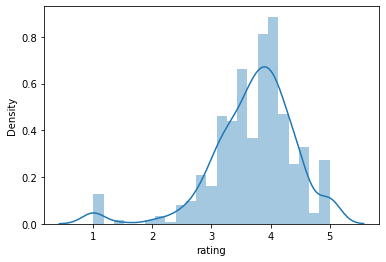

In [40]:
sns.distplot(prod_dat['rating'])

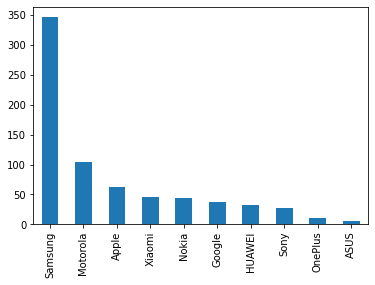

In [41]:
prod_dat['brand'].value_counts().plot(kind='bar')

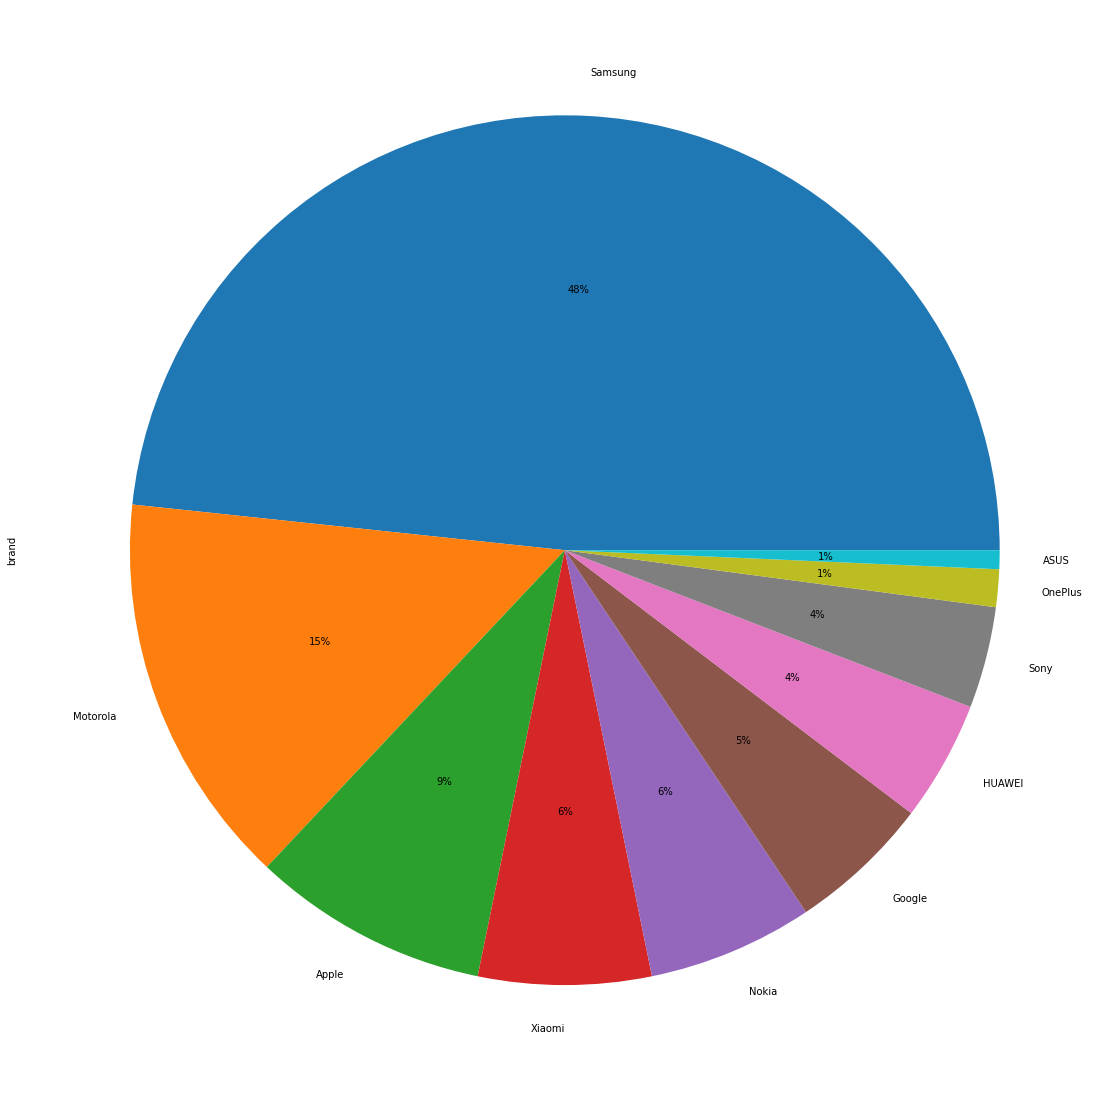

In [46]:
prod_dat['brand'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(20,20))

### 4.5 Display average rating per brand

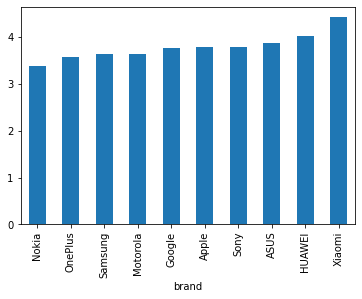

In [47]:
prod_dat.groupby('brand')['rating'].mean().sort_values().plot(kind='bar')

### 4.6 Display average price per brand

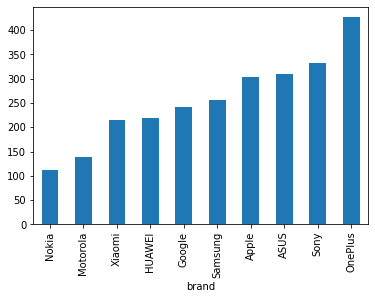

In [50]:
prod_dat.groupby('brand')['price'].mean().sort_values().plot(kind='bar')

### 4.7 Display average 'totalReviews' per brand

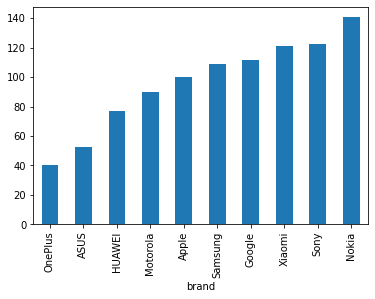

In [51]:
prod_dat.groupby('brand')['totalReviews'].mean().sort_values().plot(kind='bar')

### 4.8 Merge two datasets using 'asin' and check the shape of the final dataset

In [48]:
df = pd.merge(rev_dat, prod_dat, how='left', left_on='asin', right_on='asin')

In [53]:
df.sample()

,asin,name,rating_x,date,verified,title_x,body,helpfulVotes,brand,title_y,rating_y,totalReviews,price,originalPrice
61687,B07QCCW5KB,Cj,5,"September 24, 2019",True,It doesn't include the sim.,Gave this phone as a birthday gift to my paren...,1.0000000,Xiaomi,"Xiaomi Redmi 7 32Gb+3GB RAM 6.26"" HD+ LTE Fact...",4.4000000,146,149.0000000,0.0000000


### 4.9 Rename important features with appropriate names.
Imortant features - "rating_x": "user_rating", "title_x": "review_title", "title_y": "item_title", "rating_y": "overall_rating"

In [55]:
df.rename(columns={"rating_x": "userRating", "title_x": "reviewTitle", "title_y": "itemTitle", "rating_y": "overallRating"}, inplace=True)

In [56]:
df.sample()

,asin,name,userRating,date,verified,reviewTitle,body,helpfulVotes,brand,itemTitle,overallRating,totalReviews,price,originalPrice
31368,B06XRG6S73,Paul Paul,5,"May 7, 2019",True,Great quality,Works great! My mom loves it,nan,Apple,"Apple iPhone 6S, 16GB, Rose Gold - For AT&T / ...",3.7000000,379,143.5700000,0.0000000


### 4.10 Select rows having verified reviews and check the shape of the final dataset

In [57]:
df['verified'].value_counts()

True     61225
False     6761
Name: verified, dtype: int64

In [58]:
dff = df[df.verified == True]
dff.sample()

,asin,name,userRating,date,verified,reviewTitle,body,helpfulVotes,brand,itemTitle,overallRating,totalReviews,price,originalPrice
61976,B07QK32C8M,KAREN MA,5,"November 27, 2019",True,Buen teléfono,Tal como esperaba. Estoy satisfecho con mi com...,nan,Xiaomi,"Xiaomi Redmi Note 7 128GB + 4GB RAM 6.3"" FHD+ ...",4.1000000,229,176.9400000,0.0000000


### 4.11 Check the number of reviews for various brands and report the brand that have highest number of reviews

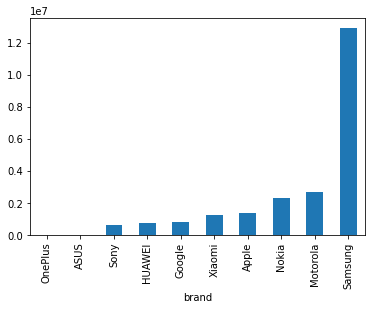

In [64]:
dff.groupby(by='brand')['totalReviews'].sum().sort_values().plot(kind='bar')

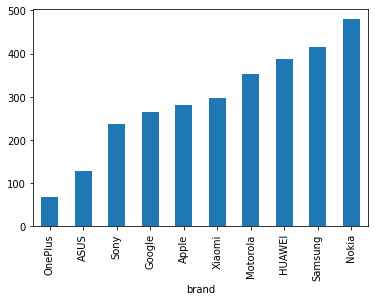

In [66]:
dff.groupby(by='brand')['totalReviews'].mean().sort_values().plot(kind='bar')

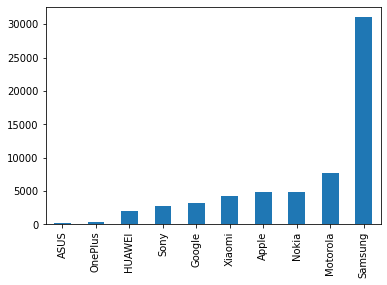

In [65]:
dff['brand'].value_counts().sort_values().plot(kind='bar')

### 4.12 Drop irrelevant columns and keep important features like 'brand','body','price','user_rating','review_title' for further analysis

In [68]:
df_final = dff[['brand','body','price','userRating','reviewTitle']]

In [69]:
df_final.sample()

,brand,body,price,userRating,reviewTitle
49751,Samsung,I bought this phone all the way back in August...,781.0500000,5,More phone that even I can use.


### 4.13 Perform univariate analysis. Check distribution of price, user_rating

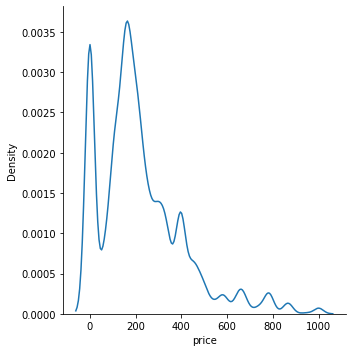

In [71]:
sns.displot(df_final['price'], kind='kde')

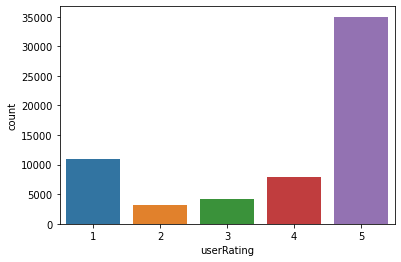

In [72]:
sns.countplot(df_final['userRating'])

### 4.14 Create a new column called "sentiment". It should have value as 1 (positive) if the user_Rating is greater than 3, value as 0 (negative) if the user_Rating <= 3

In [73]:
df_final['sentiment'] = df_final['userRating'].apply(lambda x: 1 if x>3 else 0)

In [75]:
df_final.sample(3)

,brand,body,price,userRating,reviewTitle,sentiment
28573,Samsung,My video call HD doesn't work on this phone,148.9600000,1,Video call HD doesn't work,0
65445,Samsung,very good phone,249.9900000,5,Very good,1
48127,HUAWEI,Love this phone,229.9900000,5,Very slim and look gorgeous,1


### 4.15 Check frequency distribution of the 'sentiment'

In [76]:
df_final['sentiment'].value_counts()

1    42939
0    18286
Name: sentiment, dtype: int64

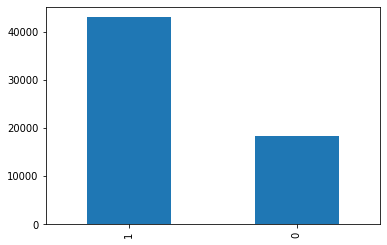

In [77]:
df_final['sentiment'].value_counts().plot(kind='bar')

### 4.16 Perform bivariate analysis. Check correlation/crosstab between features and write your inferences.

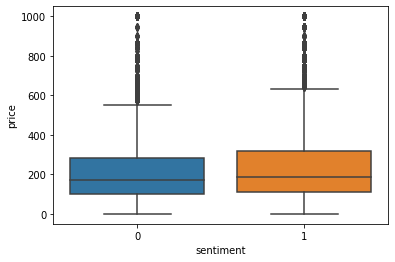

In [79]:
sns.boxplot(df_final['sentiment'], df_final['price'])

In [81]:
pd.crosstab(df_final['sentiment'], df_final['brand'])

brand,ASUS,Apple,Google,HUAWEI,Motorola,Nokia,OnePlus,Samsung,Sony,Xiaomi
sentiment,,,,,,,,,,
0,69,1627,1011,366,2220,1904,45,9499,879,628
1,137,3249,2152,1653,5494,2974,259,21521,1812,3579


## 5. Text Preprocessing and Vectorization

We will analyze the 'body' and 'review_title' to gain more understanding.

We will peform the below tasks

- Convert the text into lowercase
- Remove punctuation
- Remove stopwords (English, from nltk corpus)
- Remove other keywords like "phone" and brand name

### 5.1 Change the datatype of the 'body' column to 'str' and convert it into lowercase. Print any two samples and check the output.

In [82]:
df_final['body'].head()

14                             DON'T BUY OUT OF SERVICE
17    1 star because the phones locked so I have to ...
18    The product has been very good. I had used thi...
21    I bought this phone to replace an LG phone tha...
22    I purchased this phone for my AT&T phone repla...
Name: body, dtype: object

In [83]:
df_final.iloc[0,0]

'Motorola'

In [84]:
df_final['keywords'] = df_final['body'].str.lower()
df_final['keywords'].head()

14                             don't buy out of service
17    1 star because the phones locked so i have to ...
18    the product has been very good. i had used thi...
21    i bought this phone to replace an lg phone tha...
22    i purchased this phone for my at&t phone repla...
Name: keywords, dtype: object

In [89]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61225 entries, 14 to 67984
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        61078 non-null  object 
 1   body         61207 non-null  object 
 2   price        61225 non-null  float64
 3   userRating   61225 non-null  int64  
 4   reviewTitle  61211 non-null  object 
 5   sentiment    61225 non-null  int64  
 6   keywords     61207 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.2+ MB


### 5.2 Remove punctuations from the lowercased 'body' column and display at least two samples.

In [85]:
df_final['keywords'] = df_final['keywords'].str.replace('[^\w\s]', '')

### 5.3 Remove stop words from the above pre-processed 'body' column and display at least two samples.

In [86]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [87]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [91]:
type(df_final['keywords'])

pandas.core.series.Series

In [93]:
df_final['keywords'] = df_final['keywords'].apply(lambda words: ' '.join(w for w in str(words).split() if w not in stop_words))

In [94]:
df_final.head()

,brand,body,price,userRating,reviewTitle,sentiment,keywords
14,Motorola,DON'T BUY OUT OF SERVICE,49.9500000,1,Stupid phone,0,dont buy service
17,Motorola,1 star because the phones locked so I have to ...,49.9500000,1,Phones locked,0,1 star phones locked pay additional fees unlock
18,Motorola,The product has been very good. I had used thi...,49.9500000,5,Excellent product,1,product good used cell phone one projects work...
21,Motorola,I bought this phone to replace an LG phone tha...,99.9900000,4,"Nice, but",1,bought phone replace lg phone didnt like expec...
22,Motorola,I purchased this phone for my AT&T phone repla...,99.9900000,1,It seems it doesn't work with the existing AT&...,0,purchased phone att phone replacement even tho...


### 5.4 Apply lemmatisation on the above preprocessed text and display a few samples

In [95]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [96]:
w_tokenizer = nltk.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()


In [ ]:
w = w_tokenizer.tokenize('purchased phone att phone replacement')

In [ ]:
lemmatizer.lematize('purchases')

In [ ]:
def lemmatizer_text(text):
  return[lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [ ]:
from nklt.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


In [101]:
def lematize_text(text):
  return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [103]:
df_final['lemm'] = df_final['keywords'].apply(lematize_text)
df_final['lemm'].head()

14                                 [dont, buy, service]
17    [1, star, phone, locked, pay, additional, fee,...
18    [product, good, used, cell, phone, one, projec...
21    [bought, phone, replace, lg, phone, didnt, lik...
22    [purchased, phone, att, phone, replacement, ev...
Name: lemm, dtype: object

### 5.5 Check most common and rare words in the processed text
- We can also write a function to check word frequency of the text (Optional)

In [109]:
from collections import Counter

cnt = Counter()
for text in df_final['keywords'].values:
  for word in text.split():
    cnt[word] += 1

cnt.most_common(10)

[('phone', 74458),
 ('great', 16986),
 ('good', 13415),
 ('battery', 11641),
 ('screen', 10377),
 ('like', 10360),
 ('one', 10035),
 ('new', 9498),
 ('use', 8755),
 ('get', 7566)]

### 5.6 Initialize tf-idf vectorizer and transform the preprocessed body text

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [98]:
tfidf_vectorizer1 = TfidfVectorizer(ngram_range=(2,2))

In [99]:
tfidf = tfidf_vectorizer.fit_transform(df_final['keywords'])

### 5.7 Segregate the data into dependent (sentiment) and independent (transformed body using tf-idf) features for building a classifier. 

In [100]:
y = df_final['sentiment']

### 5.9 Split the data into Train & Test Sets

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test = train_test_split(tfidf, y, random_state = 50, stratify=y, test_size=0.3)

## 6. Model building

### 6.1 Build a random forest classifier to predict the 'sentiment'
### 6.2 Predict on test set
### 6.3 Check accuracy and confusion matrix

In [110]:
from sklearn.ensemble import RandomForestClassifier

rf_clf1 = RandomForestClassifier()
rf_clf1.fit(X_train, y1_train)
print(rf_clf1.score(X_train, y1_train))
print(rf_clf1.score(X_test, y1_test))

0.9958699862332875
0.8897539198606271


In [111]:
from sklearn.metrics import confusion_matrix

y1_pred = rf_clf1.predict(X_test)
confusion_matrix(y1_test, y1_pred)

array([[ 4064,  1422],
       [  603, 12279]])